<a href="https://colab.research.google.com/github/ManjuVijayakumar/ICTAK_DSA_June_25/blob/main/Case_study_on_Regression_DSA_June_25_Manju_Vijayakumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The given dataset contains the price of a second-hand Hyundai grand i10 car
with respect to year of making. Find the best linear relationship between year
and price. Can you predict the possible price of a 2022 model second-hand
grand i10?
Please learn about lasso regression and create a model along with linear
regression. Find out which one is performing better.

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
data= pd.read_csv('/content/sample_data/car_age_price.csv')

# reading first 5 rows
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [3]:
# reading last 5 rows
data.tail()

,Year,Price
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000
111,2015,425000


**Dataset Overview**

In [4]:
print('Dataset has {} rows and {} columns'.format(data.shape[0], data.shape[1]))

Dataset has 112 rows and 2 columns


In [5]:
# Basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [6]:
# Checking for duplicate values
data.duplicated().sum()

np.int64(54)

In [10]:
# data[data.duplicated()].sort_values(by= 'Year')

In [11]:
# Checking for missing values
data.isnull().sum()

,0
Year,0
Price,0


In [12]:
# Statistical analysis of the dataset
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


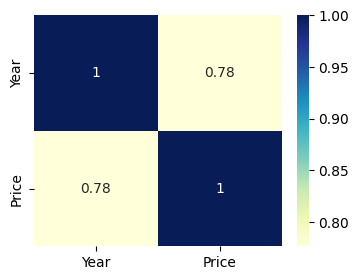

In [13]:
# Check the correlation
plt.figure(figsize = (4, 3))
sns.heatmap(data.corr(), annot= True, cmap= 'YlGnBu')
plt.show()

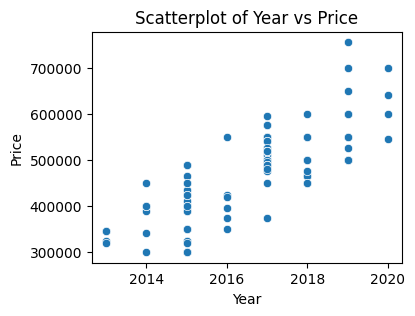

In [14]:
# Scatterplot
plt.figure(figsize= (4, 3))
sns.scatterplot(x= data.Year, y= data.Price)
plt.title('Scatterplot of Year vs Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

In [ ]:
# Checking for outliers

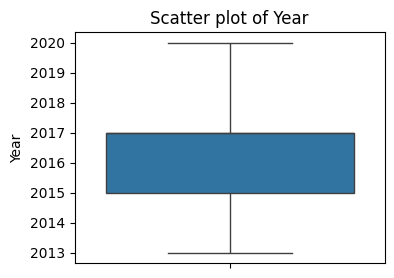

In [15]:
plt.figure(figsize= (4, 3))
sns.boxplot(data.Year)
plt.title('Scatter plot of Year')
plt.show()

**Insights**


*   Dataset has 112 rows with 2 columns
*   There are no NULL values
*   Both features are of numerice datatype
*   There are 54 duplicate values available
*   There is a strong positive correlation(r) of 0.78 between the features
*   The scatterplot indicates a rising trend in price as the year becomes more recent
*   There are no outliers present in the predictor variable, Year












**Model Building and Evaluation**

The dataset contains only 112 rows, and about 48% of them are exact duplicates. Since the dataset is relatively small, we will try applying models both with and without duplicates.

In [18]:
X = data.drop(['Price'], axis= 1)
y = data.Price

In [19]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(84, 1) (28, 1) (84,) (28,)


***Linear Regression***

In [20]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [21]:
# Model building
model = lr.fit(X_train, y_train)

# Prediction after training
train_predict= model.predict(X_train)
test_predict= model.predict(X_test)

In [22]:
train_score= model.score(X_train, y_train)
test_score= model.score(X_test, y_test)
print('Train score : {}'.format(train_score))
print('Test score: {}'.format(test_score))

Train score : 0.6358811055710352
Test score: 0.4347961632108023


In [23]:
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
print('Mean Squared Error: {}'.format(mean_squared_error(y_test, test_predict)))
print('R Squared value: {}'.format(r2_score(y_test, test_predict)))

Mean Squared Error: 3878767151.073449
R Squared value: 0.4347961632108023


In [33]:
# Kfold technique
from sklearn.model_selection import KFold, cross_val_score

kfold_model= KFold(n_splits= 10)
cv_result= cross_val_score(model, X, y, cv= kfold_model)
print(cv_result)

# for i, score in enumerate(cv_result):
#     print(f"  Fold {i+1}: {score:.4f}")

print(f"\nMean cross-validation score: {np.mean(cv_result):.4f}")
print(f"Standard deviation of cross-validation scores: {np.std(cv_result):.4f}")

[ 0.3927282  -0.30377713 -0.81478491 -1.07448326  0.7262113  -0.83291731
  0.37978439  0.66939628  0.72591157 -1.46727243]

Mean cross-validation score: -0.1599
Standard deviation of cross-validation scores: 0.7939


In [29]:
# Building the model after removing the duplicates
data_rem_dup= data.drop_duplicates(keep= 'first')
data_rem_dup.shape

(58, 2)

In [30]:
X1 = data_rem_dup.drop(['Price'], axis= 1)
y1 = data_rem_dup.Price

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size= 0.25, random_state= 43)

print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)

(43, 1) (15, 1) (43,) (15,)


In [34]:
# from sklearn.linear_model import LinearRegression
lr_1= LinearRegression()

model_1 = lr_1.fit(X_train1, y_train1)

train_score_1= model_1.score(X_train1, y_train1)
test_score_1= model_1.score(X_test1, y_test1)
print('Train score : {}'.format(train_score_1))
print('Test score: {}'.format(test_score_1))

Train score : 0.7055382930338122
Test score: 0.46038486416254576


In [38]:
test_predict1 = model_1.predict(X_test1)
print('Mean Squared Error: {}'.format(mean_squared_error(y_test1, test_predict1)))
print('R Squared value: {}'.format(r2_score(y_test1, test_predict1)))

Mean Squared Error: 5719686151.06282
R Squared value: 0.46038486416254576


In [35]:
kfold_model= KFold(n_splits= 10)
cv_result= cross_val_score(model_1, X1, y1, cv= kfold_model)
print(cv_result)

print(f"\nMean cross-validation score: {np.mean(cv_result):.4f}")
print(f"Standard deviation of cross-validation scores: {np.std(cv_result):.4f}")

[ 0.47947362 -0.10461384  0.54564135 -0.53549885  0.72970082 -0.54807385
  0.36048681  0.6362807   0.69448408 -0.19354516]

Mean cross-validation score: 0.2064
Standard deviation of cross-validation scores: 0.4782


Model performance improves when duplicate values are removed from the dataset. Model is able to explain 46% variance in car prices using the Year data. Result of cross validation displays instability in the R2 scores we got using the hold out technique.

***Polynomial Regression***

In [39]:
from sklearn.preprocessing import PolynomialFeatures
poly_feat= PolynomialFeatures(degree= 2)

In [42]:
x_poly= poly_feat.fit_transform(X_train1)

model_poly= LinearRegression()
model_poly.fit(x_poly, y_train1)

x_test_poly = poly_feat.fit_transform(X_test1)
test_predict_poly = model_poly.predict(x_test_poly)

print('Mean Squared Error: {}'.format(mean_squared_error(y_test1, test_predict_poly)))
print('R Squared value: {}'.format(r2_score(y_test1, test_predict_poly)))

Mean Squared Error: 6249780046.04033
R Squared value: 0.4103739576914378


Model performance declined to 41%

***Lasso Regression***

Lasso( Least Absolute Shrinkage and Selection Operator) is a regression analysis method that performs both feature selection and regularization in order to enhance the prediction accuracy and interpretability of the model.

In [ ]:
# Original dataset with duplicate values

In [44]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [45]:
# Define model
lasso_model= Lasso(random_state= 42)

# Define grid for alpha values
param_grid= {'alpha' : [0.001, 0.01, 0.1, 1, 10]}

# Grid Search
grid = GridSearchCV(lasso_model, param_grid, cv=5, scoring='r2')
grid.fit(X_train1, y_train1)

GridSearchCV(cv=5, estimator=Lasso(random_state=42),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]}, scoring='r2')

In [54]:
# Best model
print('Best alpha :{}'.format(grid.best_params_['alpha']))
print('Best CV R2 : {}'.format(grid.best_score_))

Best alpha :10
Best CV R2 : 0.6024977355258662


In [46]:
best_lasso_model= grid.best_estimator_
test_lasso_r2 = best_lasso_model.score(X_test1, y_test1)
print('Test r2 with best alpha : {}'.format(test_lasso_r2))

Test r2 with best alpha : 0.46039996326368693


In [47]:
# Scale the Year feature
scaler= StandardScaler()
X_train1_scaled= scaler.fit_transform(X_train1)
X_test1_scaled= scaler.transform(X_test1)

In [49]:
# Define model
lasso_model1 = Lasso(random_state= 42)

# Define grid for alpha values
param_grid= {'alpha' : [0.001, 0.01, 0.1, 1, 10]}

# Grid Search
grid = GridSearchCV(lasso_model1, param_grid, cv=5, scoring='r2')
grid.fit(X_train1_scaled, y_train1)


GridSearchCV(cv=5, estimator=Lasso(random_state=42),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]}, scoring='r2')

In [51]:
# Best model
print('Best alpha :{}'.format(grid.best_params_['alpha']))
print('Best CV R2 : {}'.format(grid.best_score_))

Best alpha :10
Best CV R2 : 0.6024977355258662


In [52]:
# Evaluation on test set
grid.best_estimator_

Lasso(alpha=10, random_state=42)

In [53]:
best_lasso_model= grid.best_estimator_
test_lasso_r2_1 = best_lasso_model.score(X_test1_scaled, y_test1)
print('Test r2 with best alpha : {}'.format(test_lasso_r2_1))

Test r2 with best alpha : 0.46041362348954473


In [55]:
print(best_lasso_model.score(X_train1_scaled, y_train1))
print(best_lasso_model.score(X_test1_scaled, y_test1))

0.7055382840985382
0.46041362348954473


**Insights**

Out of 3 models applied on the dataset (Linear Regression, Polynomial Regression and Lasso Regression), **Linear and Lasso is able to explain 46% of variation in car prices based on Year alone**. The StratifiedCV method applied on Linear model says less stability in the R2 value received.

The models shows signs of limited generalization ability since R2 goes upto 70% in training data. This means the current predictor (Year) does not provide enough predictive power and additional features may required to improve performance.

Among the models tested, **Lasso regression** showed comparitively better performance.

Can you predict the possible price of a 2022 model second-hand grand i10?

In [75]:
# Using Linear Regression
input = np.array([[2022]])

value = model_1.predict(input)

value

array([735960.65573771])

In [84]:
# Using Lasso Regression
year_input = 2022

# scaling applied to the year
year_scaled= scaler.transform([[year_input]])

predicted_price = best_lasso_model.predict(year_scaled)

predicted_price

array([735931.11277094])

In [83]:
print('Predicted price using Lasso Regression : {}'.format(round(predicted_price[0], 0)))
print('Predicted price using Linear Regression : {}'.format(round(value[0], 0)))

Predicted price using Lasso Regression : 735931.0
Predicted price using Linear Regression : 735961.0
